In [11]:
from scipy import *
import hmf
import astropy.units as u

In [15]:
#a=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/sample_maps/mnv0.00000_om0.30000_As2.1000/out_66.list')
#b=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/sample_maps/mnv0.10000_om0.30000_As2.1000/out_66.list')
#hist_masles = histogram(log10(a.T[2]), bins=arange(10.3, 15.6, 0.1))[0]
#hist_massiv = histogram(log10(b.T[2]), bins=arange(10.3, 15.6, 0.1))[0]

mbins = arange(10.35, 15.5, 0.1)
hist0, hist1 = load('sample_maps/hist_01.npy') / 0.1 / 512.0**3

/Users/jia/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


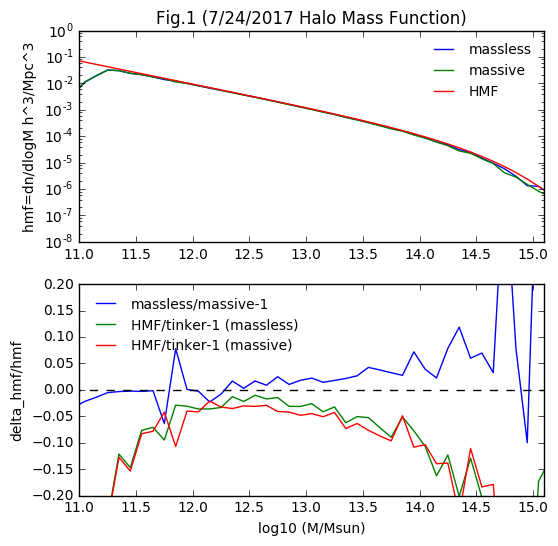

In [64]:
Hmassles = hmf.MassFunction(cosmo_params={"Ob0":0.04551, "H0":70.0, "Om0":0.3, 
           "m_nu":array([0,0,0])*u.eV},z=0, Mmin=10.35, Mmax=15.5, dlog10m=0.1, sigma_8=0.8524, n=0.97)
Hmassive = hmf.MassFunction(cosmo_params={"Ob0":0.04551, "H0":70.0, "Om0":0.3, 
          "m_nu":array([0.033,0.033,0.033])*u.eV},z=0, Mmin=10.35, Mmax=15.5, dlog10m=0.1, sigma_8=0.8297, n=0.97)
#hmf_model=hmf.fitting_functions.Behroozi

f=figure(figsize=(6,6))
ax1=f.add_subplot(211)
ax2=f.add_subplot(212)

ax1.plot(mbins, hist0, label='HMF (sims, massless)')
ax1.plot(mbins, hist1, label='HMF (sims, massive 0.1eV)')
ax1.plot(mbins, Hmassive.dndlog10m, label='HMF (Tinker+08)')
ax1.set_yscale('log')
ax1.set_ylabel('hmf=dn/dlogM h^3/Mpc^3')
ax1.set_xlim(11,15.1)
ax1.legend(fontsize=10,frameon=0)
ax1.set_title('Fig.1 (7/24/2017 Halo Mass Function)')
ax2.plot(mbins, hist0/hist1-1,label='massless/massive-1')
ax2.plot(mbins, hist0/Hmassles.dndlog10m-1,label='HMF_sims/HMF_tinker-1 (massless)')
ax2.plot(mbins, hist1/Hmassive.dndlog10m-1,label='HMF_sims/HMF_tinker-1 (massive)')
ax2.plot(mbins, zeros(len(mbins)),'k--')
ax2.set_xlabel('log10 (M/Msun)')
ax2.set_ylabel('delta_hmf/hmf')
ax2.set_xlim(11,15.1)
ax2.set_ylim(-0.2,0.2)
ax2.legend(fontsize=10,frameon=0,loc=0)
show()
